<a href="https://colab.research.google.com/github/siddarth-c/Pattern-Recognition/blob/main/A3/A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pattern Recognition Assignment 3**

In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Question 1

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PR/gender_feature_vectors.csv')
df.head(3)

,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,1,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,-0.044872,0.272529,-0.107907,-0.190014,-0.145586,-0.012682,0.154819,-0.241271,-0.162936,-0.120377,-0.047154,-0.004024,0.010867,0.013803,0.033862,-0.165088,-0.356740,-0.104970,-0.089917,0.163656,-0.138332,0.011188,0.005595,-0.144617,-0.070563,0.089040,0.042198,-0.013146,-0.088541,...,0.176488,0.023528,-0.042136,0.146026,-0.060144,-0.045779,0.005116,-0.040269,-0.146532,0.020204,-0.071422,-0.070934,0.039376,-0.073057,0.013110,0.073191,-0.174984,0.112673,0.050317,-0.087701,-0.033930,0.018559,-0.087492,0.076850,0.160139,-0.359518,0.225189,0.175419,-0.003953,0.142986,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,2,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,-0.044821,0.271853,-0.041583,-0.252784,-0.117582,-0.040385,0.112987,-0.199148,-0.059140,-0.138428,-0.128424,0.139366,0.032024,0.092371,0.043215,-0.143541,-0.271580,-0.007330,-0.176620,0.074239,-0.121689,0.007702,0.039026,-0.212572,-0.110950,0.037608,0.048441,-0.049306,-0.044366,...,0.068932,-0.057217,-0.111655,0.211533,-0.086261,0.087350,0.046462,0.012710,-0.140843,-0.009904,-0.077447,-0.016317,0.019141,-0.092818,0.007209,0.017404,-0.177952,0.121269,-0.034220,-0.007996,-0.047971,-0.019876,-0.088064,0.071553,0.130182,-0.311870,0.315533,0.231109,-0.002901,0.161646,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,3,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,-0.052085,0.248798,-0.023033,-0.284685,-0.207826,0.078375,0.110781,-0.099561,-0.159526,-0.156689,-0.046377,-0.066865,-0.016259,0.119524,-0.036528,-0.200072,-0.347999,-0.092376,-0.110221,0.003830,-0.072553,-0.037326,0.049584,-0.241518,-0.144820,0.016032,0.116784,-0.058099,-0.026928,...,0.139447,-0.073286,-0.028742,0.176206,0.000778,0.061516,0.151425,0.097024,-0.069615,-0.021548,-0.135799,0.083675,0.152181,-0.062115,0.024492,0.094129,-0.092504,0.125004,-0.017716,-0.031443,0.050664,-0.127573,-0.048483,-0.116371,0.103385,-0.245697,0.202906,0.183545,-0.075050,0.141646,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116


In [29]:
df1 = df.drop(['Unnamed: 0', 'Unnamed: 1'], axis = 1)
X = np.array(df1)

In [67]:
def PCA(X, d_dash = int(.95 * len(X))):

    mean = np.average(X, axis = 0)
    Z = (X - mean) /  (np.max(X, axis = 0) - np.min(X, axis = 0))
    cov_mat = np.dot(Z.T, Z)
    e_val, e_vec = np.linalg.eig(cov_mat)

    sorted_e_val = np.flip(np.sort(e_val))
    sorted_e_vec = e_vec.copy()
    dummy = 0

    for val in sorted_e_val:
        ind = np.argmax(e_val == val * 1)
        sorted_e_vec[:,dummy] = e_vec[:,ind]
        dummy +=1

    Z_star = np.dot(Z, sorted_e_vec)

    return Z_star[:,:d_dash]

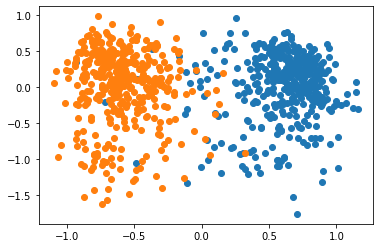

In [68]:
plt.scatter(PCA(X, 2)[400:,0], PCA(X, 2)[400:,1])
plt.scatter(PCA(X, 2)[:400,0], PCA(X, 2)[:400,1])
plt.show()